In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import defaultdict

# Experimental Constants

In [2]:
NUM_REPEATS = 10
TRAIN_SIZE = 5000

In [3]:
synthetic_results_path = "../results/synthetic_data/"
method_types = {'models_causal_impute': {'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'], 
                                              'dml_learner': ['double_ml', 'causal_forest']}, 
                'models_causal_survival': ['causal_survival_forest'], 
                'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']}

imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']

# File Loading and Structure of Results Pickles

In [4]:
# Loop through all method types
for method_category, subtypes in method_types.items():
    print(f"\n=== {method_category} ===")
    
    if method_category == 'models_causal_impute':
        for subgroup, method_list in subtypes.items():
            for method in method_list:
                method_path = os.path.join(synthetic_results_path, method_category, subgroup, method)
                if not os.path.exists(method_path):
                    print(f"Path not found: {method_path}")
                    continue

                for imp in imputation_methods:
                    file_name = f"{method}_{imp}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                    file_path = os.path.join(method_path, file_name)
                    if os.path.exists(file_path):
                        print(file_path)
                        if subgroup == 'meta_learner':
                            file_path_impute_meta_meta = file_path
                        else:
                            file_path_impute_meta_dml = file_path
                    else:
                        print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival':
        for method in subtypes:
            method_path = os.path.join(synthetic_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            file_name = f"{method}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
            file_path = os.path.join(method_path, file_name)
            if os.path.exists(file_path):
                print(file_path)
                file_path_causal_survival = file_path
            else:
                print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival_meta':
        for method in subtypes:
            method_path = os.path.join(synthetic_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            for surv in survival_models:
                file_name = f"{method}_{surv}_repeats_{NUM_REPEATS}_train_{TRAIN_SIZE}.pkl"
                file_path = os.path.join(method_path, file_name)
                if os.path.exists(file_path):
                    print(file_path)
                    file_path_causal_survival_meta = file_path
                else:
                    print(f"Missing: {file_path}")


=== models_causal_impute ===
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/t_learner/t_learner_IPCW-T_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/s_learner/s_learner_IPCW-T_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/x_learner/x_learner_Pseudo_obs_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_learner/x_learner/x_learner_Margin_repeats_10_train_5000.pkl
../results/synthetic_data/models_causal_impute/meta_le

In [ ]:
with open(file_path_impute_meta_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_meta_meta}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: meta_learner")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Base Regression Methods: (third layer keys):")
print(list(data['e_X_U']['scenario_B'].keys()))
print()
print("Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['xgb'].keys()))
print()
print("(a) Specific Experiment Repeat: (fifth layer keys):")
print(list(data['e_X_U']['scenario_B']['xgb']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fifth layer keys):")
print(list(data['e_X_U']['scenario_B']['xgb']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_impute/meta_learner/dr_learner/dr_learner_IPCW-T_repeats_10_train_5000.pkl
Category: models_causal_impute_meta
Subgroup: meta_learner

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Base Regression Methods: (third layer keys):
['lasso', 'rf', 'xgb']

Experiment Repeats: (fourth layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fifth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval']
(b) Average of all Experiment Repeats: (fifth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pre

In [ ]:
with open(file_path_impute_meta_dml, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_meta_dml}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: double_machine_learning")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_B'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_impute/dml_learner/causal_forest/causal_forest_IPCW-T_repeats_10_train_5000.pkl
Category: models_causal_impute_meta
Subgroup: double_machine_learning

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', '

In [ ]:
with open(file_path_causal_survival, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_B'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_survival/causal_survival_forest/causal_survival_forest_repeats_10_train_5000.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'runtime']


In [ ]:
with open(file_path_causal_survival_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival_meta}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['e_X_U'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['e_X_U']['scenario_B'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['random_idx0'].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['e_X_U']['scenario_B']['average'].keys()))

Loaded data from ../results/synthetic_data/models_causal_survival_meta/matching_learner_survival/matching_learner_survival_DeepHit_repeats_10_train_5000.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']

Simulation Scenarios: (second layer keys):
['scenario_1', 'scenario_2', 'scenario_5', 'scenario_8', 'scenario_9']

Experiment Repeats: (third layer keys):
['random_idx0', 'random_idx1', 'random_idx2', 'random_idx3', 'random_idx4', 'random_idx5', 'random_idx6', 'random_idx7', 'random_idx8', 'random_idx9', 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_a

# Adjusted True ATE

In [ ]:
TRUE_ATE = {('RCT_0_5', 'scenario_B'): 0.124969, ('RCT_0_5', 'scenario_A'): 0.163441, ('RCT_0_5', 'scenario_C'): 0.74996,
            ('RCT_0_5', 'scenario_E'): 0.7537, ('RCT_0_5', 'scenario_D'): 0.723925,
            ('RCT_0_05', 'scenario_B'): 0.124969, ('RCT_0_05', 'scenario_A'): 0.163441, ('RCT_0_05', 'scenario_C'): 0.74996,
            ('RCT_0_05', 'scenario_E'): 0.7537, ('RCT_0_05', 'scenario_D'): 0.723925,
            ('e_X', 'scenario_B'): 0.124969, ('e_X', 'scenario_A'): 0.163441, ('e_X', 'scenario_C'): 0.74996,
            ('e_X', 'scenario_E'): 0.7537, ('e_X', 'scenario_D'): 0.723925,
            ('e_X_U', 'scenario_B'): 0.131728, ('e_X_U', 'scenario_A'): 0.003744, ('e_X_U', 'scenario_C'): 0.74036,
            ('e_X_U', 'scenario_E'): 0.74032, ('e_X_U', 'scenario_D'): 0.830668,
            ('e_X_no_overlap', 'scenario_B'): 0.124969, ('e_X_no_overlap', 'scenario_A'): 0.163441, ('e_X_no_overlap', 'scenario_C'): 0.74996,
            ('e_X_no_overlap', 'scenario_E'): 0.7537, ('e_X_no_overlap', 'scenario_D'): 0.723925,
            ('e_X_info_censor', 'scenario_B'): 0.124969, ('e_X_info_censor', 'scenario_A'): 0.163441, ('e_X_info_censor', 'scenario_C'): 0.74996,
            ('e_X_info_censor', 'scenario_E'): 0.7537, ('e_X_info_censor', 'scenario_D'): 0.723925,
            ('e_X_U_info_censor', 'scenario_B'): 0.131728, ('e_X_U_info_censor', 'scenario_A'): 0.003744, ('e_X_U_info_censor', 'scenario_C'): 0.74036,
            ('e_X_U_info_censor', 'scenario_E'): 0.74032, ('e_X_U_info_censor', 'scenario_D'): 0.830668,
            ('e_X_no_overlap_info_censor', 'scenario_B'): 0.124969, ('e_X_no_overlap_info_censor', 'scenario_A'): 0.163441, 
            ('e_X_no_overlap_info_censor', 'scenario_C'): 0.74996, ('e_X_no_overlap_info_censor', 'scenario_E'): 0.7537, 
            ('e_X_no_overlap_info_censor', 'scenario_D'): 0.723925}

# Aggregate results

In [ ]:
import os
import pickle
import pandas as pd
from sklearn.metrics import root_mean_squared_error

def aggregate_results(
    synthetic_results_path: str,
    train_size: int = 5000,
    num_repeats: int = 10,
    true_ate = None,
) -> pd.DataFrame:
    # Constants
    method_types = {
        'models_causal_impute': {
            'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'],
            'dml_learner': ['double_ml', 'causal_forest']
        },
        'models_causal_survival': ['causal_survival_forest'],
        'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']
    }
    imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
    survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']
    experiment_setups = ['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']
    scenarios = ['scenario_B', 'scenario_A', 'scenario_C', 'scenario_E', 'scenario_D']

    # Results container
    results_table = []

    def append_result_row(abstract_key, method_key, method_category, imputation_method, base_model, base_survival, setup, scenario, 
                          mse_test, mse_valid, mse, ate_bias, ate_bias_interval):
        results_table.append({
            "abstract_method": abstract_key,
            "method": method_key,
            "category": method_category,
            "imputation_method": imputation_method,
            "base_model": base_model,
            "base_survival": base_survival,
            "experiment_setup": setup,
            "scenario": scenario,
            "mean_cate_mse_test": mse_test,
            "mean_cate_mse_valid": mse_valid,
            "cate_mse": mse,
            "ate_bias": ate_bias,
            "ate_bias_interval": ate_bias_interval
        })

    def mse_calculation(exp_data, subset="all"):
        cate_true_each_repeat = ([exp_data[rnd_repeat]['cate_true'] 
                                  for rnd_repeat in exp_data 
                                  if rnd_repeat != "average"])
        cate_pred_each_repeat = ([exp_data[rnd_repeat]['cate_pred'] 
                                  for rnd_repeat in exp_data 
                                  if rnd_repeat != "average"])
        
        len_valid = len(cate_true_each_repeat[0]) // 2

        if subset == "all":
            mse = np.array([root_mean_squared_error(cate_true_each_repeat[i], cate_pred_each_repeat[i]) 
                            for i in range(len(cate_true_each_repeat))])
        elif subset == "valid":
            mse = np.array([root_mean_squared_error(cate_true_each_repeat[i][:len_valid], cate_pred_each_repeat[i][:len_valid]) 
                            for i in range(len(cate_true_each_repeat))])
        elif subset == "test":
            mse = np.array([root_mean_squared_error(cate_true_each_repeat[i][len_valid:], cate_pred_each_repeat[i][len_valid:]) 
                            for i in range(len(cate_true_each_repeat))])
        return mse
    

    def ate_bias_calculation(exp_data, true_ate):
        if true_ate is None:
            ate_bias_each_repeat = np.array([exp_data[rnd_repeat]['ate_bias'] 
                                             for rnd_repeat in exp_data 
                                             if rnd_repeat != "average"])
        else:
            ate_bias_each_repeat = np.array([exp_data[rnd_repeat]['ate_pred'] 
                                             for rnd_repeat in exp_data 
                                             if rnd_repeat != "average"]) - true_ate
        
        return ate_bias_each_repeat
    

    def ate_interval_calculation(exp_data, true_ate):
        ate_interval_each_repeat = []
        for i, rnd_repeat in enumerate(exp_data):
            true_ate_current = exp_data[rnd_repeat]['ate_true'] if true_ate is None else true_ate
            if "ate_interval" in exp_data[rnd_repeat]:
                ate_interval_ = exp_data[rnd_repeat]['ate_interval']
                ate_interval_each_repeat.append((ate_interval_[0]- true_ate_current,
                                                 ate_interval_[1] - true_ate_current))
            else:
                ate_interval_each_repeat.append((true_ate_current, true_ate_current))
        
        return ate_interval_each_repeat
    

    for method_category, subtypes in method_types.items():
        if method_category == 'models_causal_impute':
            for subgroup, method_list in subtypes.items():
                for method in method_list:
                    for imp in imputation_methods:
                        file_name = f"{method}_{imp}_repeats_{num_repeats}_train_{train_size}.pkl"
                        file_path = os.path.join(synthetic_results_path, method_category, subgroup, method, file_name)
                        if not os.path.exists(file_path):
                            continue
                        with open(file_path, "rb") as f:
                            data = pickle.load(f)
                        for exp in experiment_setups:
                            if exp not in data:
                                continue
                            for scen in scenarios:
                                if scen not in data[exp]:
                                    continue
                                if subgroup == "meta_learner":
                                    for base_model in data[exp][scen]:
                                        # avg_data = data[exp][scen][base_model].get("average", {})
                                        # mse = avg_data.get("mean_cate_mse", None)
                                        mse_test  = mse_calculation(data[exp][scen][base_model], "test") 
                                        mse_valid = mse_calculation(data[exp][scen][base_model], "valid")  
                                        ate_bias = ate_bias_calculation(data[exp][scen][base_model], true_ate.get((exp, scen), None))  
                                        ate_bias_interval = ate_interval_calculation(data[exp][scen][base_model], true_ate.get((exp, scen), None))                                       
                                        if mse_test is not None:
                                            abstract_key = f"{method}"
                                            key = f"{method}+{imp}+{base_model}"
                                            category = f"{method_category}/{subgroup}"
                                            append_result_row(abstract_key, key, category, imp, base_model, None, exp, scen, 
                                                              np.mean(mse_test), np.mean(mse_valid), mse_test, ate_bias, ate_bias_interval)
                                else:
                                    # avg_data = data[exp][scen].get("average", {})
                                    # mse = avg_data.get("mean_cate_mse", None)
                                    mse_test  = mse_calculation(data[exp][scen], "test")
                                    mse_valid = mse_calculation(data[exp][scen], "valid")     
                                    ate_bias = ate_bias_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                                    ate_bias_interval = ate_interval_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                                    if mse_test is not None:
                                        abstract_key = f"{method}"
                                        key = f"{method}+{imp}"
                                        category = f"{method_category}/{subgroup}"
                                        append_result_row(abstract_key, key, category, imp, None, None, exp, scen, 
                                                          np.mean(mse_test), np.mean(mse_valid), mse_test, ate_bias, ate_bias_interval)

        elif method_category == 'models_causal_survival':
            for method in subtypes:
                file_name = f"{method}_repeats_{num_repeats}_train_{train_size}.pkl"
                file_path = os.path.join(synthetic_results_path, method_category, method, file_name)
                if not os.path.exists(file_path):
                    continue
                with open(file_path, "rb") as f:
                    data = pickle.load(f)
                for exp in experiment_setups:
                    if exp not in data:
                        continue
                    for scen in scenarios:
                        if scen not in data[exp]:
                            continue
                        # avg_data = data[exp][scen].get("average", {})
                        # mse = avg_data.get("mean_cate_mse", None)
                        mse_test  = mse_calculation(data[exp][scen], "test")  
                        mse_valid = mse_calculation(data[exp][scen], "valid")   
                        ate_bias = ate_bias_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                        ate_bias_interval = ate_interval_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                        if mse_test is not None:
                            append_result_row(method, method, method_category, None, None, None, exp, scen, 
                                              np.mean(mse_test), np.mean(mse_valid), mse_test, ate_bias, ate_bias_interval)

        elif method_category == 'models_causal_survival_meta':
            for method in subtypes:
                for surv_model in survival_models:
                    file_name = f"{method}_{surv_model}_repeats_{num_repeats}_train_{train_size}.pkl"
                    file_path = os.path.join(synthetic_results_path, method_category, method, file_name)
                    if not os.path.exists(file_path):
                        continue
                    with open(file_path, "rb") as f:
                        data = pickle.load(f)
                    for exp in experiment_setups:
                        if exp not in data:
                            continue
                        for scen in scenarios:
                            if scen not in data[exp]:
                                continue
                            # avg_data = data[exp][scen].get("average", {})
                            # mse = avg_data.get("mean_cate_mse", None)
                            mse_test = mse_calculation(data[exp][scen], "test")
                            mse_valid = mse_calculation(data[exp][scen], "valid")
                            ate_bias = ate_bias_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                            ate_bias_interval = ate_interval_calculation(data[exp][scen], true_ate.get((exp, scen), None))
                            if mse_test is not None:
                                abstract_key = f"{method}"
                                key = f"{method}+{surv_model}"
                                append_result_row(abstract_key, key, method_category, None, None, surv_model, exp, scen, 
                                                  np.mean(mse_test), np.mean(mse_valid), mse_test, ate_bias, ate_bias_interval)

    # Build DataFrame and compute Borda ranking
    df_results = pd.DataFrame(results_table)
    # pivot_df = df_results.pivot_table(index="method", columns=["experiment_setup", "scenario"], values="cate_mse")
    # rank_df = pivot_df.rank(axis=0, method='min', ascending=True)
    # avg_rank = rank_df.mean(axis=1).sort_values()
    # borda_table = avg_rank.reset_index()
    # borda_table.columns = ["method", "avg_borda_rank"]
    return df_results


In [11]:
def get_borda_ranking(df_results: pd.DataFrame, ranking_method="method", ranking_metric="mean_cate_mse_test") -> pd.DataFrame:
    # Pivot the DataFrame to create a matrix of ranks
    pivot_df = df_results.pivot_table(index=ranking_method, columns=["experiment_setup", "scenario"], values=ranking_metric)
    
    # Rank the methods for each scenario
    rank_df = pivot_df.rank(axis=0, method='min', ascending=True)
    
    # Calculate the average rank for each method
    avg_rank = rank_df.mean(axis=1).sort_values()
    
    # Create a DataFrame with the average ranks
    borda_table = avg_rank.reset_index()
    borda_table.columns = ["method", "avg_borda_rank"]
    
    return borda_table, rank_df

In [12]:
df_results = aggregate_results("../results/synthetic_data/", true_ate=TRUE_ATE)
borda_table, rank_df = get_borda_ranking(df_results, ranking_metric="mean_cate_mse_test")

borda_table

,method,avg_borda_rank
0,matching_learner_survival+DeepSurv,6.700000
1,s_learner_survival+DeepSurv,6.850000
2,double_ml+Margin,7.475000
3,x_learner+Pseudo_obs+lasso,10.700000
4,double_ml+IPCW-T,12.525000
5,causal_survival_forest,12.875000
6,causal_forest+Margin,13.075000
7,x_learner+IPCW-T+rf,13.150000
8,x_learner+IPCW-T+lasso,13.775000
9,double_ml+Pseudo_obs,14.650000


## Plotting Helper

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_borda_ranking(
    borda_table_subset: pd.DataFrame,
    save_suffix: str = "",
    min_rank: float = None,
    max_rank: float = None,
    figsize: tuple = (12, 3),
    shift_rank_text: float = 0.7,
):
    """
    Plots a Borda ranking visualization for the top-k methods.
    
    Parameters:
    - borda_table_subset: DataFrame with 'method' and 'avg_borda_rank' columns (already filtered to top-k).
    - save_suffix: Optional suffix to include in the saved file name.
    - min_rank: Minimum x-axis rank value (optional).
    - max_rank: Maximum x-axis rank value (optional).
    """

    # Labeling maps
    meta_map = {
        "t_learner": "T-Learner", "s_learner": "S-Learner", "x_learner": "X-Learner", "dr_learner": "DR-Learner"
    }
    impute_map = {
        "Pseudo_obs": "Pseudo-Obs", "Margin": "Margin", "IPCW-T": "IPCW-T"
    }
    base_model_map = {
        "lasso": "Lasso", "xgb": "XGB", "rf": "RandomForest"
    }
    dml_map = {
        "double_ml": "Double-ML", "causal_forest": "Causal Forest"
    }
    survival_meta_map = {
        "t_learner_survival": "T-Learner-Survival",
        "s_learner_survival": "S-Learner-Survival",
        "matching_learner_survival": "Matching-Survival"
    }
    base_survival_map = {"DeepSurv": "DeepSurv", "DeepHit": "DeepHit", "RandomSurvivalForest": "RSF"}
    
    def get_clean_label(method):
        parts = method.split("+")
        if len(parts) == 1:
            if parts[0] == "causal_survival_forest":
                return "Causal Survival Forest"
            elif parts[0] in meta_map: # abstract_method plot
                return meta_map[parts[0]]
            elif parts[0] in dml_map:
                return dml_map[parts[0]]
            elif parts[0] in survival_meta_map:
                return survival_meta_map[parts[0]]
        elif len(parts) == 2:
            if parts[0] in dml_map:
                return f"{dml_map[parts[0]]} ({impute_map.get(parts[1], parts[1])})"
            elif parts[0] in survival_meta_map:
                return f"{survival_meta_map[parts[0]]} ({base_survival_map.get(parts[1], parts[1])})"
        elif len(parts) == 3:
            return f"{meta_map[parts[0]]} ({impute_map.get(parts[1], parts[1])}, {base_model_map.get(parts[2], parts[2])})"
        return method
    
    def get_color(method):
        parts = method.split("+")
        if len(parts) == 1:
            if parts[0] == "causal_survival_forest":
                return (44/255, 160/255, 44/255, 0.8)
            elif parts[0] in meta_map: # abstract_method plot
                return (31/255, 119/255, 180/255, 0.6)
            elif parts[0] in dml_map:
                return (8/255, 77/255, 117/255, 0.8)
            elif parts[0] in survival_meta_map:
                return (214/255, 39/255, 40/255, 0.8)
        elif len(parts) == 2:
            if parts[0] in dml_map:
                return (8/255, 77/255, 117/255, 0.8)
            elif parts[0] in survival_meta_map:
                return (214/255, 39/255, 40/255, 0.8)
        elif len(parts) == 3:
            return (31/255, 119/255, 180/255, 0.6)
        return (0.5, 0.5, 0.5, 0.5)

    df = borda_table_subset.copy()
    df["clean_label"] = df["method"].apply(get_clean_label)
    df["color"] = df["method"].apply(get_color)
    df = df.sort_values("avg_borda_rank").reset_index(drop=True)

    top_5 = df.iloc[:5]
    bottom_5 = df.iloc[5:][::-1]

    computed_min_rank = df["avg_borda_rank"].min()
    computed_max_rank = df["avg_borda_rank"].max()

    min_rank = computed_min_rank - 1 if min_rank is None else min_rank
    max_rank = computed_max_rank + 1 if max_rank is None else max_rank

    fig, ax = plt.subplots(figsize=figsize)
    ax.hlines(y=0, xmin=int(min_rank), xmax=int(max_rank), color='black', linewidth=1)
    ax.text(int(min_rank) - 0.2, 0, "Avg Rank", ha='right', va='center', fontsize=14, fontweight='bold')

    for x in range(int(min_rank), int(max_rank) + 1):
        ax.vlines(x=x, ymin=-0.2, ymax=0.2, color='black')
    # ax.text(0.75, 0, "Avg Rank", ha='right', va='center', fontsize=14, fontweight='bold')
    # Half-step tick marks (e.g., 1.5, 2.5, ..., 9.5)
    for x in [i + 0.5 for i in range(int(min_rank), int(max_rank) + 1)]:
        ax.vlines(x=x, ymin=-0.15, ymax=0.15, color='black', linewidth=0.8)  # thinner and shorter

    # Draw lines for top 5 and bottom 5 methods
    for i, row in top_5.iterrows():
        y_val = -1 - i
        ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color=row["color"])
        ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=int(min_rank), color=row["color"])
        ax.text(int(min_rank) - 0.1, y_val, row["clean_label"], ha='right', va='center', fontsize=16)
        ax.text(int(min_rank)+shift_rank_text, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

    for i, row in bottom_5.iterrows():
        y_val = -1 - (4 - i + 5)
        ax.vlines(x=row["avg_borda_rank"], ymin=0, ymax=y_val, color=row["color"])
        ax.hlines(y=y_val, xmin=row["avg_borda_rank"], xmax=int(max_rank), color=row["color"])
        ax.text(int(max_rank) + 0.1, y_val, row["clean_label"], ha='left', va='center', fontsize=16)
        ax.text(int(max_rank)-shift_rank_text, y_val + 0.2, f"{row['avg_borda_rank']:.2f}", ha='center', fontsize=14, fontweight='bold')

    ax.set_xlim(min_rank, max_rank)
    ax.set_ylim(-6, 1)

    # Enable visible x-ticks
    xtick_values = list(range(int(min_rank), int(max_rank) + 1))
    ax.set_xticks(xtick_values)
    ax.set_xticklabels(xtick_values, fontsize=16)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=True, pad=-22)
    ax.set_yticks([])
    ax.grid(False)
    plt.box(False)
    plt.tight_layout()

    # Optional saving
    plt.savefig(f"figure_results/average_ranks/average_ranking_visualization_method_combination_{save_suffix}.pdf", dpi=300, bbox_inches='tight')
    plt.show()


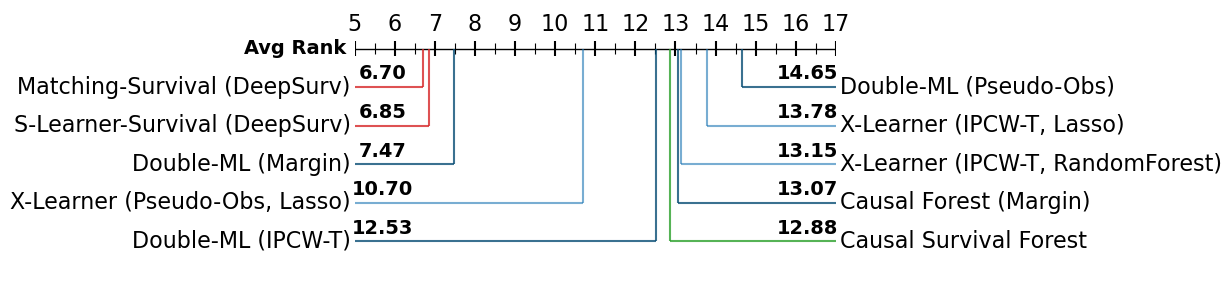

,method,avg_borda_rank
0,matching_learner_survival+DeepSurv,6.700
1,s_learner_survival+DeepSurv,6.850
2,double_ml+Margin,7.475
3,x_learner+Pseudo_obs+lasso,10.700
4,double_ml+IPCW-T,12.525
5,causal_survival_forest,12.875
6,causal_forest+Margin,13.075
7,x_learner+IPCW-T+rf,13.150
8,x_learner+IPCW-T+lasso,13.775
9,double_ml+Pseudo_obs,14.650


In [23]:
plot_borda_ranking(borda_table[:10], min_rank=5, max_rank=17, save_suffix="top_10_total", figsize=(12.5, 3))

borda_table[:10]

# Best of Each Experimental Setting for the Abstract Method

In [15]:
# Group by experiment_setup, scenario, and abstract_method, then get the idx of the row with the lowest mean_cate_mse_valid
best_idx = (
    df_results.groupby(["experiment_setup", "scenario", "abstract_method"])["mean_cate_mse_valid"]
    .idxmin()
)

# Use those indices to select rows
best_model_for_each_exp_setting = df_results.loc[best_idx].reset_index(drop=True)
best_model_for_each_exp_setting

,abstract_method,method,category,imputation_method,base_model,base_survival,experiment_setup,scenario,mean_cate_mse_test,mean_cate_mse_valid,cate_mse,ate_bias,ate_bias_interval
0,causal_forest,causal_forest+IPCW-T,models_causal_impute/dml_learner,IPCW-T,None,None,RCT_0_05,scenario_1,0.812399,0.847409,"[0.8157664814629356, 0.810729878918187, 0.7650...","[-0.023345143768928683, -0.03328158551926416, ...","[(0.124969, 0.124969), (0.124969, 0.124969), (..."
1,causal_survival_forest,causal_survival_forest,models_causal_survival,None,None,None,RCT_0_05,scenario_1,0.805958,0.842859,"[0.80529221135498, 0.8033523973585511, 0.75655...","[0.0679748627452163, 0.020856351811939733, -0....","[(0.124969, 0.124969), (0.124969, 0.124969), (..."
2,double_ml,double_ml+Margin,models_causal_impute/dml_learner,Margin,None,None,RCT_0_05,scenario_1,0.806450,0.842408,"[0.8035249114143068, 0.8031303301369618, 0.759...","[-0.0007833096943658246, -0.01663744801700799,...","[(0.124969, 0.124969), (0.124969, 0.124969), (..."
3,dr_learner,dr_learner+Margin+lasso,models_causal_impute/meta_learner,Margin,lasso,None,RCT_0_05,scenario_1,0.810148,0.845585,"[0.8102830043687385, 0.8092943352341223, 0.757...","[0.033954656604994776, -0.03290821142025892, -...","[(0.124969, 0.124969), (0.124969, 0.124969), (..."
4,matching_learner_survival,matching_learner_survival+DeepSurv,models_causal_survival_meta,None,None,DeepSurv,RCT_0_05,scenario_1,0.812573,0.847839,"[0.8105257451369442, 0.8084000022258484, 0.753...","[0.07656999715768759, -0.025343318827601727, -...","[(0.124969, 0.124969), (0.124969, 0.124969), (..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,s_learner,s_learner+Margin+xgb,models_causal_impute/meta_learner,Margin,xgb,None,e_X_no_overlap_info_censor,scenario_9,6.364377,6.610285,"[6.289628420598505, 6.287836859184997, 5.86482...","[-0.623749528746307, -0.7787095473349095, -0.5...","[(-1.2667043134013052, 0.019205255908691043), ..."
396,s_learner_survival,s_learner_survival+RandomSurvivalForest,models_causal_survival_meta,None,None,RandomSurvivalForest,e_X_no_overlap_info_censor,scenario_9,6.321326,6.564200,"[6.265326127821591, 6.24173525860888, 5.838383...","[-0.5886753940092659, -0.5874202697961646, -0....","[(0.723925, 0.723925), (0.723925, 0.723925), (..."
397,t_learner,t_learner+Margin+rf,models_causal_impute/meta_learner,Margin,rf,None,e_X_no_overlap_info_censor,scenario_9,6.379171,6.621251,"[6.288694818165062, 6.298467974928615, 5.91973...","[-0.6206592914039426, -0.7556425857225115, -0....","[(-1.531142512754436, 0.2898239299465505), (-1..."
398,t_learner_survival,t_learner_survival+RandomSurvivalForest,models_causal_survival_meta,None,None,RandomSurvivalForest,e_X_no_overlap_info_censor,scenario_9,6.313564,6.558336,"[6.25052034142046, 6.274948466973299, 5.811056...","[-0.5410946144193789, -0.3646227896407456, -0....","[(0.723925, 0.723925), (0.723925, 0.723925), (..."


In [16]:
borda_table_each_abstract_method, rank_df_each_abstract_method = get_borda_ranking(best_model_for_each_exp_setting, ranking_method="abstract_method", ranking_metric="mean_cate_mse_test")

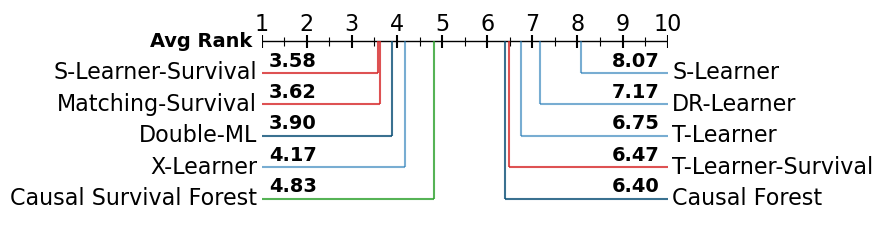

,method,avg_borda_rank
0,s_learner_survival,3.575
1,matching_learner_survival,3.625
2,double_ml,3.900
3,x_learner,4.175
4,causal_survival_forest,4.825
5,causal_forest,6.400
6,t_learner_survival,6.475
7,t_learner,6.750
8,dr_learner,7.175
9,s_learner,8.075


In [25]:
plot_borda_ranking(borda_table_each_abstract_method, min_rank=1, max_rank=10, save_suffix="each_abstract_method", figsize=(9, 2.5))
borda_table_each_abstract_method

# Scenario-wise Performance

Scenario A


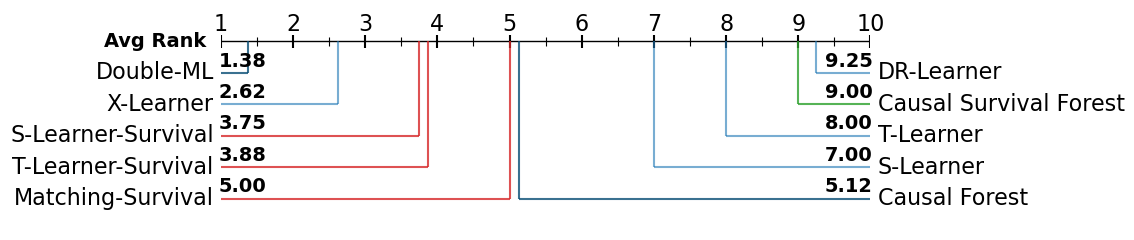



Scenario B


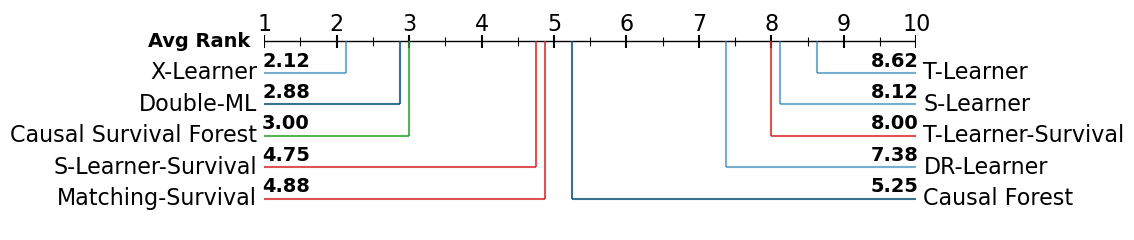



Scenario C


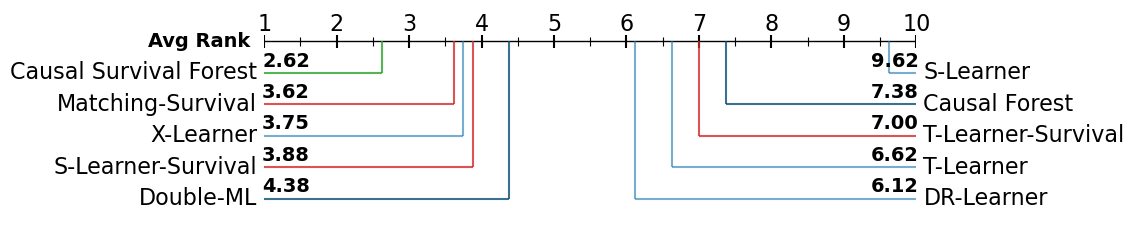



Scenario D


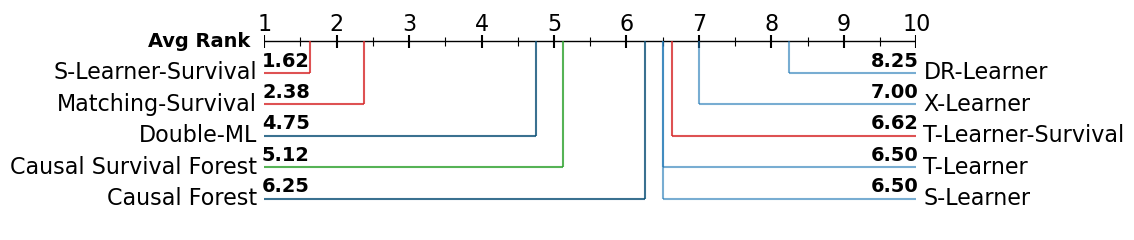



Scenario E


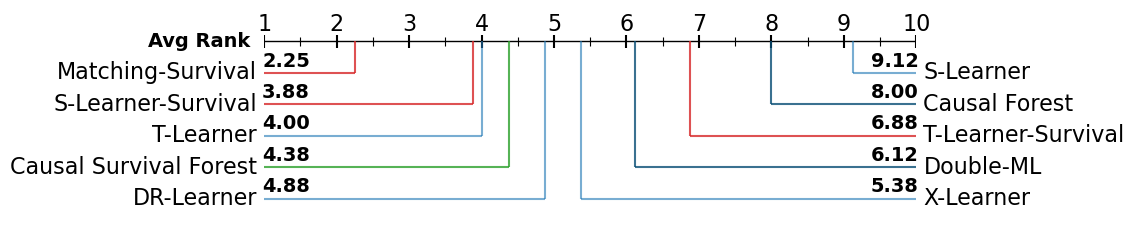

In [ ]:
for scen in ['scenario_B', 'scenario_A', 'scenario_C', 'scenario_E', 'scenario_D']:

    borda_table_each_abstract_method, rank_df_each_abstract_method = get_borda_ranking(best_model_for_each_exp_setting[best_model_for_each_exp_setting['scenario'] == scen], 
                                                                                       ranking_method="abstract_method", ranking_metric="mean_cate_mse_test")
    
    # if scen == 'scenario_1':
    #     print("Scenario B")
    # elif scen == 'scenario_2':
    #     print("Scenario A")
    # elif scen == 'scenario_5':
    #     print("Scenario C")
    # elif scen == 'scenario_8':
    #     print("Scenario E")
    # elif scen == 'scenario_9':
    #     print("Scenario D")
    print(scen)
    # print(borda_table_each_abstract_method)
    plot_borda_ranking(borda_table_each_abstract_method, min_rank=1, max_rank=10, save_suffix=scen, figsize=(11.5, 2.5), shift_rank_text=0.3)

    print("\n======================\n")

# Experiment-wise Performance

Experiment Setup: RCT_0_5


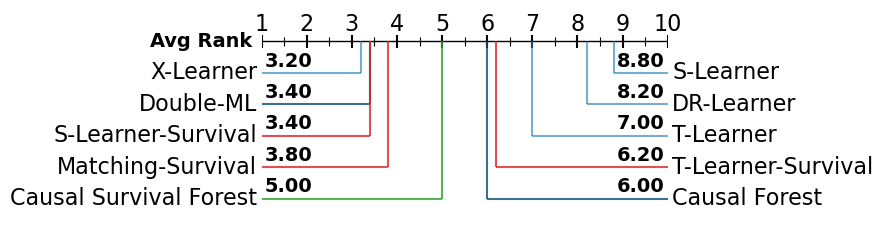



Experiment Setup: RCT_0_05


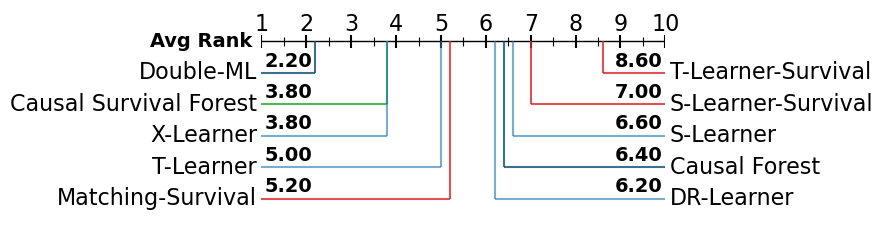



Experiment Setup: e_X


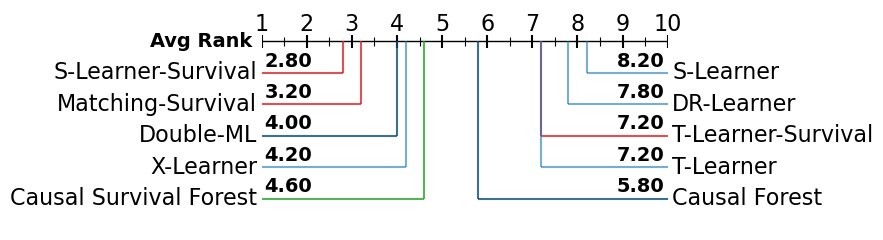



Experiment Setup: e_X_U


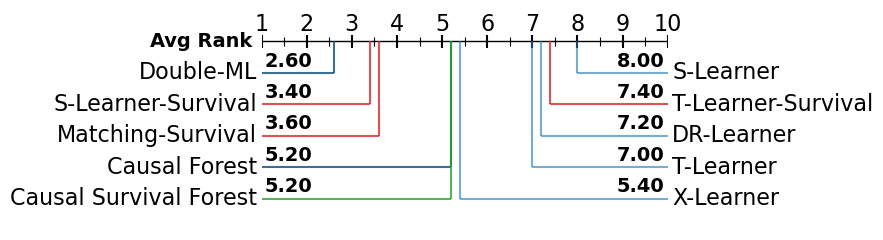



Experiment Setup: e_X_no_overlap


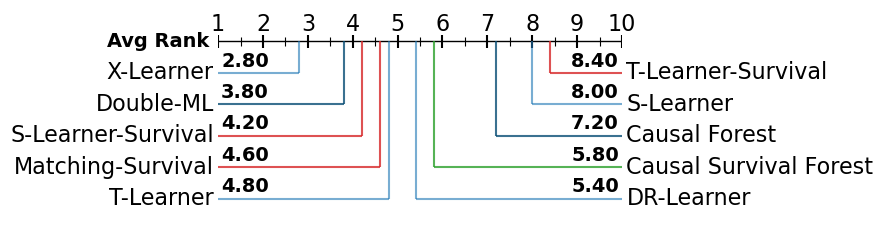



Experiment Setup: e_X_info_censor


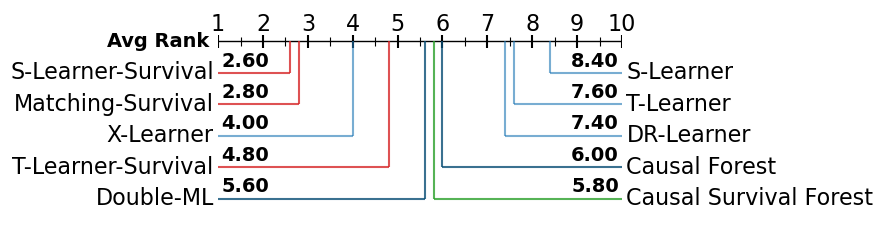



Experiment Setup: e_X_U_info_censor


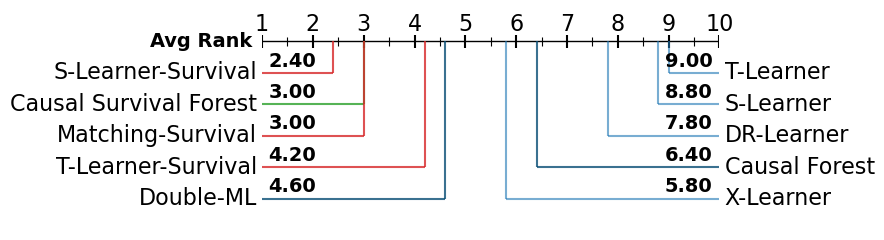



Experiment Setup: e_X_no_overlap_info_censor


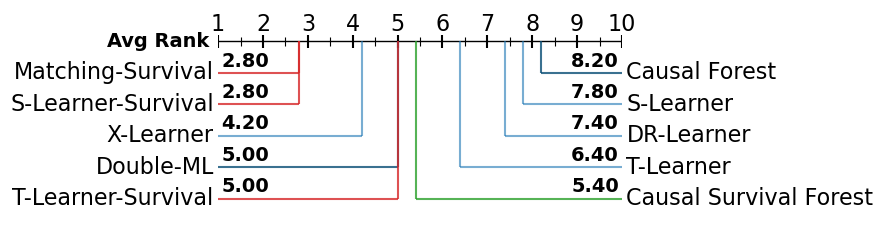

In [67]:
for exp in ['RCT_0_5', 'RCT_0_05', 'e_X', 'e_X_U', 'e_X_no_overlap', 'e_X_info_censor', 'e_X_U_info_censor', 'e_X_no_overlap_info_censor']:
    borda_table_each_abstract_method, rank_df_each_abstract_method = get_borda_ranking(best_model_for_each_exp_setting[best_model_for_each_exp_setting['experiment_setup'] == exp], 
                                                                                       ranking_method="abstract_method", ranking_metric="mean_cate_mse_test")
    
    print("Experiment Setup:", exp)
    # print(borda_table_each_abstract_method)
    plot_borda_ranking(borda_table_each_abstract_method, min_rank=1, max_rank=10, save_suffix=exp, figsize=(9, 2.5), shift_rank_text=0.6)

    print("\n======================\n")